In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [18]:
df = pd.read_csv("/content/drive/MyDrive/Colab/Zomato.csv", encoding='ISO-8859-1')
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [19]:
df.shape

(148, 7)

In [20]:
def handleRate(value):
  value = str(value).split('/')
  value = value[0]
  return float(value)

df['rate'] = df['rate'].apply(handleRate)
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


[]

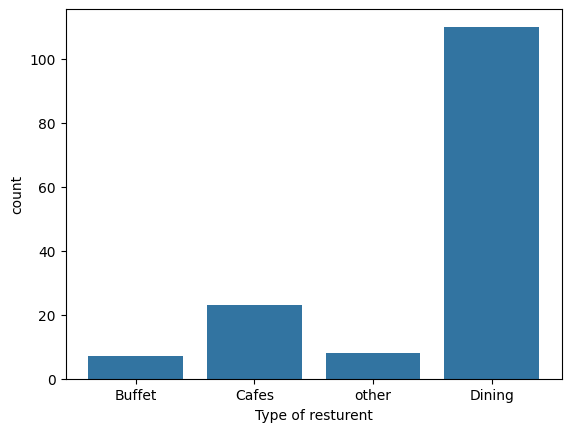

In [26]:
sns.countplot(x=df['listed_in(type)'])
plt.xlabel("Type of resturent")
plt.plot()

Text(0, 0.5, 'votes')

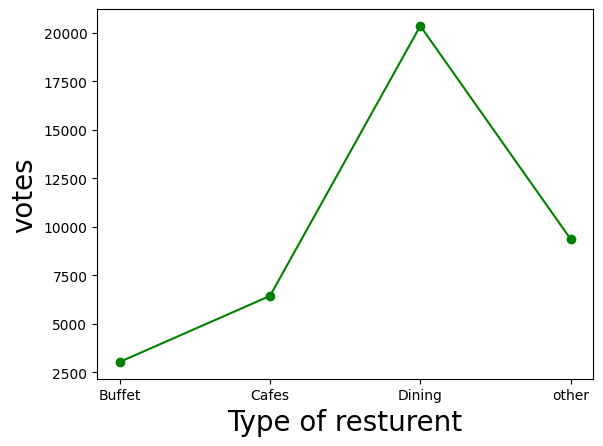

In [28]:
grouped_Data = df.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_Data})
plt.plot(result ,color='green', marker ='o')
plt.xlabel("Type of resturent",size=20)
plt.ylabel("votes",size=20)

In [29]:
max_vote = df['votes'].max()
resturent_with_max_vote = df.loc[df['votes']==max_vote ,'name']
resturent_with_max_vote

38    Empire Restaurant
Name: name, dtype: object

<Axes: xlabel='online_order', ylabel='count'>

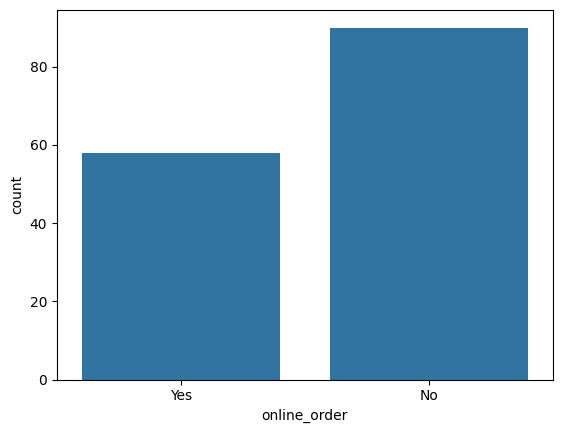

In [30]:
sns.countplot(x=df['online_order'])

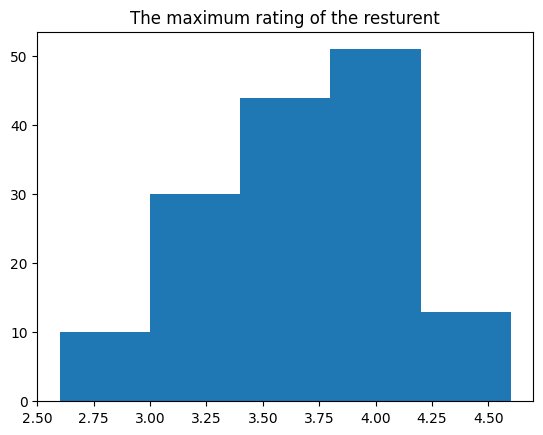

In [32]:
plt.hist(df['rate'], bins=5)
plt.title("The maximum rating of the resturent")
plt.show()

Finding the cost of the two people food


<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

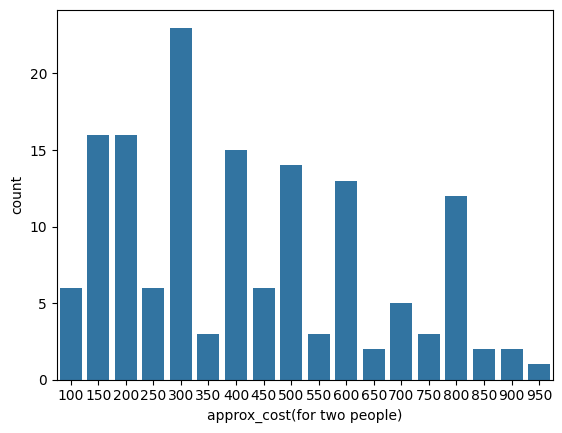

In [36]:
couple_cost = df['approx_cost(for two people)']
sns.countplot(x=couple_cost)

<Axes: xlabel='online_order', ylabel='rate'>

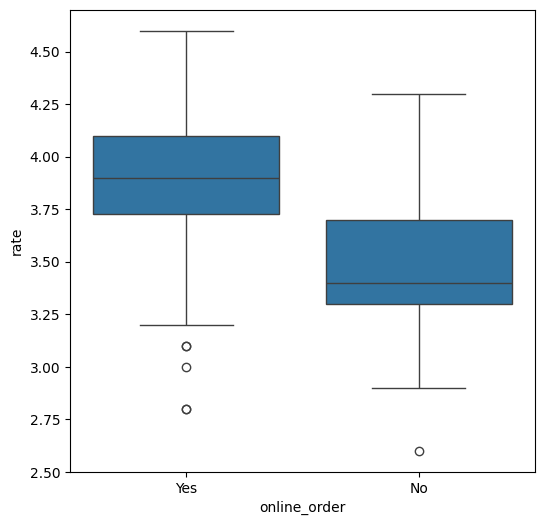

In [37]:
plt.figure(figsize=(6,6))
sns.boxplot(x = 'online_order' , y = 'rate', data = df)


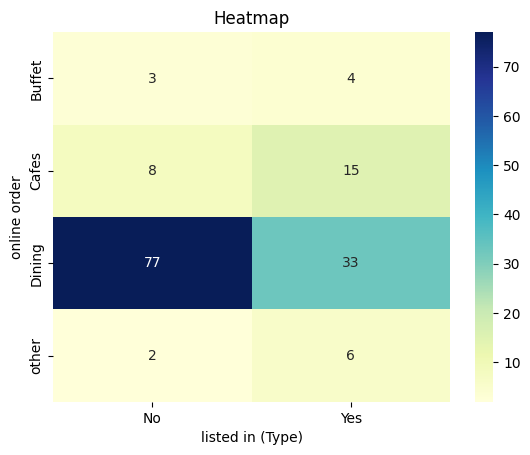

In [40]:
pivot_table = df.pivot_table(index='listed_in(type)' ,columns='online_order', aggfunc='size' ,fill_value=0)
sns.heatmap(pivot_table ,annot=True, cmap='YlGnBu', fmt='d')
plt.title("Heatmap")
plt.xlabel('listed in (Type)')
plt.ylabel('online order')
plt.show()